<a href="https://colab.research.google.com/github/HamoodFaridi/Deep-Learning/blob/master/MNIST_Fashion_Classification_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Model, model_from_json
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def load_dataset():
  (X_train, Y_train), (X_val_test, Y_val_test) = load_data()
  X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
  X_val_test = X_val_test.reshape((X_val_test.shape[0], 28, 28, 1))
  Y_train = to_categorical(Y_train)
  Y_val_test = to_categorical(Y_val_test)
  return X_train, Y_train, X_val_test, Y_val_test

def model(input_shape, classes=10):
  X_input = Input(shape=input_shape)
  X = ZeroPadding2D((3, 3))(X_input)
  # Layer 1
  X = Conv2D(32, (3, 3), strides=(1, 1), name='Conv1')(X)
  X = Dropout(rate=0.2)(X)
  X = Activation('relu')(X)
  X = MaxPool2D(pool_size=(2, 2), name='max_pool1')(X)
  # Layer 2
  X = Conv2D(64, (3, 3), strides=(1, 1), name='Conv2')(X)
  X = Dropout(rate=0.3)(X)
  X = Activation('relu')(X)
  X = MaxPool2D(pool_size=(2, 2), name='max_pool2')(X)
  # Layer 3
  X = Conv2D(128, (3, 3), strides=(1, 1), name='Conv3')(X)
  X = Dropout(rate=0.2)(X)
  X = Activation('relu')(X)
  X = MaxPool2D(pool_size=(2, 2), name='max_pool3')(X)
  # Flatten layer before feeding it in the dense layer. After flattening, all neurons of input layer are connected
  # to all the neurons of the next (Dense) layer
  X = Flatten()(X)
  X = Dense(256, activation='relu')(X)
  X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input, outputs=X, name='TestModel_BN')

  return model

def plot_model():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

def Normalize(data, mean_data =None, std_data =None):
    if not mean_data:
        mean_data = np.mean(data)
    if not std_data:
        std_data = np.std(data)
    norm_data = (data-mean_data)/std_data
    return norm_data, mean_data, std_data

In [ ]:
# The loading dataset fuction also takes care of ctegorical representation of output labels.
X_train, Y_train, X_val_test, Y_val_test = load_dataset()
# Preporcessing step to normalize the dataset in order to scale the data in the same range.
X_train, mean_data, std_data = Normalize(X_train)
# Splitting the dataset into train and test to divide between validation and test dataset
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size = 0.2, random_state = 42)
# Normalizing the validation and test dataset
X_val, _, _ = Normalize(X_val, mean_data, std_data)
X_test, a, b = Normalize(X_test, mean_data, std_data)
# X_val = X_val / 255.
model = model(X_train.shape[1:], classes=10)
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train, Y_train, batch_size=16, epochs=30, validation_data=(X_val, Y_val))

Epoch 1/30
3750/3750 [==============================] - 12s 3ms/step - loss: 0.6012 - accuracy: 0.7794 - val_loss: 0.5353 - val_accuracy: 0.8511
Epoch 2/30
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3963 - accuracy: 0.8553 - val_loss: 0.4424 - val_accuracy: 0.8654
Epoch 3/30
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3461 - accuracy: 0.8733 - val_loss: 0.4189 - val_accuracy: 0.8765
Epoch 4/30
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3156 - accuracy: 0.8827 - val_loss: 0.3835 - val_accuracy: 0.8865
Epoch 5/30
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2964 - accuracy: 0.8909 - val_loss: 0.3707 - val_accuracy: 0.8873
Epoch 6/30
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2818 - accuracy: 0.8969 - val_loss: 0.3586 - val_accuracy: 0.8861
Epoch 7/30
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2706 - accuracy: 0.9002 - val_loss: 0.3350 - val_ac

In [ ]:
#Saving the model and the weights to the disk
model_json = model.to_json()
with open('./Model_Weights/MNIST_Fashion/Keras_Dropout/mnist_model_dropout.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('./Model_Weights/MNIST_Fashion/Keras_Dropout/mnist_weights_dropout.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
# Evaluate model on test dataset
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))

print ("Test Accuracy is {:2.2f} %".format(preds[1] * 100))

63/63 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.9210
Loss = 0.22178548574447632
Test Accuracy is 92.10 %


In [ ]:
# Dsiplaying the classification Report 
labelNames = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
	"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
prediction = model.predict(X_test)
y_pred = np.argmax(prediction, axis = 1)
print(classification_report(Y_test.argmax(axis=1), y_pred=y_pred, target_names=labelNames))

              precision    recall  f1-score   support

         top       0.86      0.88      0.87       168
     trouser       0.99      0.98      0.99       198
    pullover       0.92      0.88      0.90       223
       dress       0.94      0.93      0.93       199
        coat       0.89      0.84      0.87       186
      sandal       0.97      0.99      0.98       211
       shirt       0.74      0.80      0.77       198
     sneaker       0.92      0.98      0.95       210
         bag       0.99      0.99      0.99       191
  ankle boot       0.99      0.92      0.96       216

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
# Dsiplaying the confusion matrix
# print(pd.DataFrame(confusion_matrix(np.argmax(Y_test, axis = 1), y_pred), columns=labelNames, index=labelNames))
try:
    data_frame = pd.DataFrame(confusion_matrix(np.argmax(Y_test, axis = 1), y_pred), columns=labelNames, index=labelNames)
    # data_frame.to_csv(r'./Confusion_Matrix/MNIST_Dropout/mnist_dropout_model_df.csv')
    print(data_frame)
except:
    print("Couldn't save the confusion matrix")

            top  trouser  pullover  dress  ...  shirt  sneaker  bag  ankle boot
top         148        0         1      4  ...     15        0    0           0
trouser       1      195         0      0  ...      0        0    0           0
pullover      5        0       196      1  ...     18        0    0           0
dress         5        1         2    185  ...      2        0    0           0
coat          0        0         6      2  ...     21        0    0           0
sandal        0        0         0      0  ...      0        2    0           0
shirt        14        1         9      5  ...    158        0    2           0
sneaker       0        0         0      0  ...      0      205    0           1
bag           0        0         0      0  ...      0        0  190           0
ankle boot    0        0         0      0  ...      0       15    0         199

[10 rows x 10 columns]


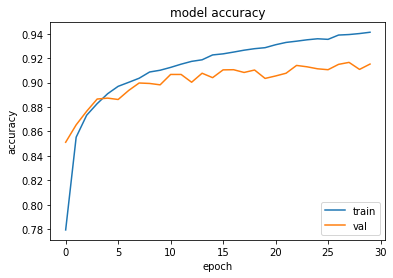

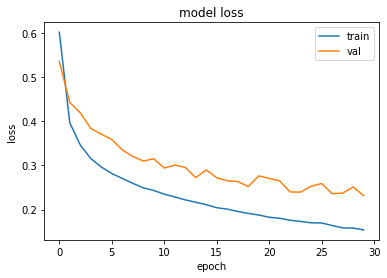

In [ ]:
# Plotting the model for train and vaidation data
plot_model()